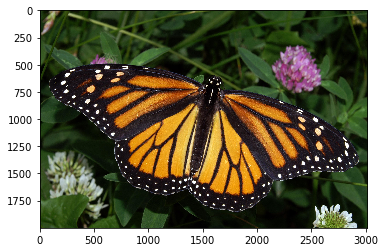

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image = cv2.imread('images/monarch.jpg')

#change color to rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [6]:
#prepare data for k-means
#reshape into 2D array or pixel, 3color values(RGB)
pixel_vals = image.reshape((-1, 3))

#convert to float type
pixel_vals = np.float32(pixel_vals)

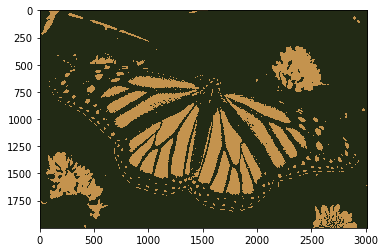

In [8]:
#implement k-mean
#define the stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#PERFORM K=MEAN CLUSTERING
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#CONVERT DATA INTO 8-bit VALUES
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

#reshape data into the original image dimension
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

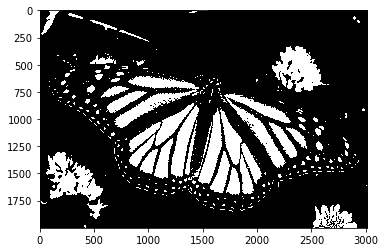

In [10]:
plt.imshow(labels_reshape == 0, cmap = 'gray')

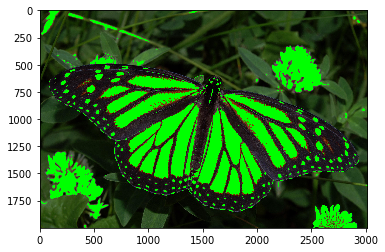

In [11]:
#mask the image segment by cluster
cluster = 0

masked_image = np.copy(image)
#turn the mask green
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)